# CSI 6160 Homework 1
### Samantha Bracellari & Justin Kur

For this assignment, we chose to implement the perceptron algorithm and train it on Sci-Kit Learn's breast cancer dataset.

The breast cancer dataset is an appropriate fit for the perceptron machine learning algorithm since it is a binary classification dataset. It has 569 samples, each with 30 attributes.

We first begin by importing any necessary packages & loading the data.

In [50]:
# imports
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

In [51]:
data = load_breast_cancer()
X, Y = data['data'], data['target']

## The Perceptron Algorithm

Before implementing our own Perceptron algorithm, we wanted to establish a baseline using Sci-Kit Learn's Perceptron model. This would give us something to compare to when analyzing the accuracy of our own model. Sklearn's model yielded an accuracy score of roughly 93%; this gave us a number to try and reach with our model.

#### Sci-Kit's Perceptron

In [52]:
perceptron = Perceptron().fit(X, Y)
print(f"Train Accuracy: {100 * perceptron.score(X, Y):.1f}%")

Train Accuracy: 92.6%


#### Our Vanilla Perceptron

In [56]:
# perceptron algorithm implementation

scores = [] # for plotting purposes
def train_loop(X, Y, num_epoch=100, use_bias=True):
    # if we are using the bias term, we need to add an extra dimension to the weight vector
    # start with initial weights of 0
    weights = np.zeros(X.shape[1] + (1 if use_bias else 0)) 

    for epoch in range(num_epoch):
        num_correct = 0
        for x, y in zip(X, Y):
            # if using the bias term, append a 1 to the sample to account for the dimension change
            x = np.append(x, np.ones(1, dtype=np.float32)) if use_bias else x
            pred = int(x.dot(weights) >= 0.0) # 1 = positive, 0 = negative

            if pred != y: # misprediction
                if y == 1: # mistake on a positive
                    weights += x 
                else: # mistake on a negative
                    weights -= x
            else:
                num_correct += 1

        scores.append(100 * num_correct / len(X))
        if epoch % 10 == 0:
            print(f"Train Accuracy: {100 * num_correct / len(X):.1f}%")
    return weights

weights = train_loop(data["data"], data["target"])

Train Accuracy: 70.5%
Train Accuracy: 85.6%
Train Accuracy: 88.6%
Train Accuracy: 87.9%
Train Accuracy: 88.4%
Train Accuracy: 89.1%
Train Accuracy: 89.3%
Train Accuracy: 89.5%
Train Accuracy: 91.4%
Train Accuracy: 90.0%


We ran our model for 100 iterations and spot checked the accuracy to ensure the model was behaving as expected. From the above output, you can see that the accuracy of our model hovered between 90-92%, which is pretty close to the accuracy score of Sci-Kit's built-in Perceptron algorithm. A graph below that depicts accuracy over time confirms this.

Text(0.5, 0, 'Epoch')

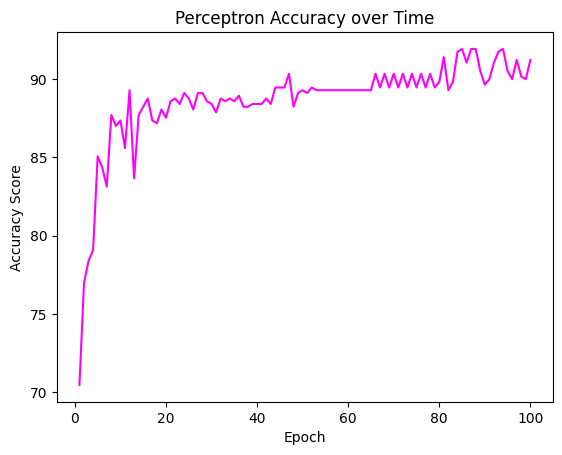

In [57]:
plt.plot(range(1, 101), scores, c='magenta')
plt.title('Perceptron Accuracy over Time')
plt.ylabel('Accuracy Score')
plt.xlabel('Epoch')

As an extra experiment, we wanted to see how the model would perform if we were to perform singular value decomposition on it, reducing it from 30 features to 2. For this, we just used Sci-Kit Learn's `TruncatedSVD` function.

In [58]:
svd = TruncatedSVD()
small_X = svd.fit_transform(X) # reduce the dataset to 2 dimensions instead of 30

Then, we trained the model with the 2D data and checked the accuracy. Note that we're opting not to use the bias term here; this is solely for graphing purposes. This choice may lead to a reduction in the overall accuracy of the model, but it was still pretty good - around 79-80%.

In [59]:
small_weights = train_loop(small_X, Y, use_bias=False)

Train Accuracy: 68.7%
Train Accuracy: 79.4%
Train Accuracy: 79.6%
Train Accuracy: 78.0%
Train Accuracy: 79.6%
Train Accuracy: 80.0%
Train Accuracy: 79.4%
Train Accuracy: 79.6%
Train Accuracy: 79.8%
Train Accuracy: 79.6%


In [60]:
rotated = np.zeros_like(small_weights) 
rotated[0] = small_weights[1]
rotated[1] = -1.0 * small_weights[0]

rotated[1] / rotated[0]

-0.06439427808800478

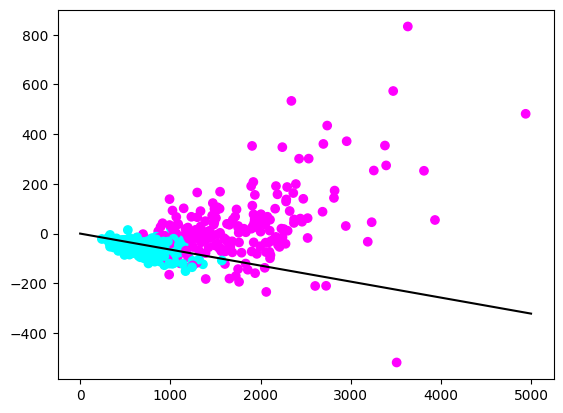

In [61]:
f, ax = plt.subplots()
colors = ['cyan' if y == 1 else 'magenta' for y in Y]
ax.scatter(small_X[:, 0], small_X[:, 1], c=colors)
line_x = np.linspace(0, 5000, 5)
line_y = line_x * (rotated[1] / rotated[0])
ax.plot(line_x, line_y, c='black')